# Machine-learning Model

LinearRegression, Random Forest

In [21]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, mean_squared_error, RocCurveDisplay
from sklearn.model_selection import KFold, train_test_split

In [34]:
data = np.genfromtxt("./oneD_power.csv", delimiter=",", skip_header=1)

X = data[:, :-1]
y = data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
# Scaler2 = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200000, 6)
(50000, 6)
(200000,)
(50000,)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

predicted_power = model.predict(X)

(0.003582860400265332, 5.457263637127106e-05, 0.07401987796680976)

# RandomForest

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # 100

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(rf_mae, rf_mse, rf_r2)

predicted_power = rf_model.predict(X_scaled)

0.0005928758861698958 1.1984198940678273e-05 0.7966539508543661


# Visualization

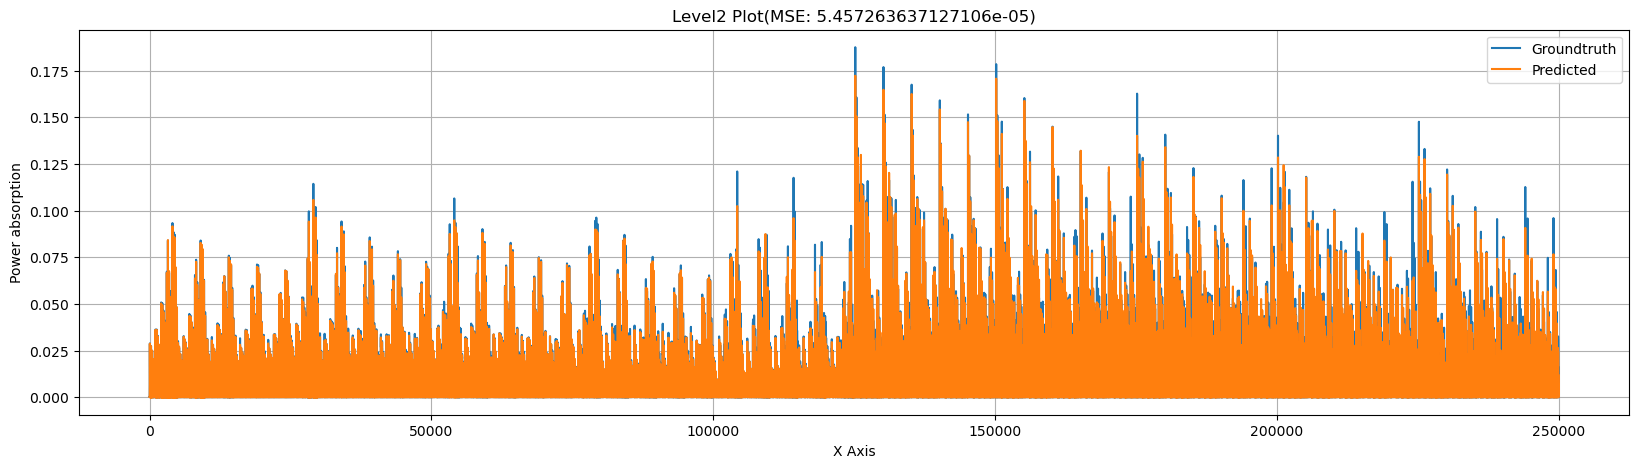

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,5))
plt.plot(y, label='Groundtruth')
plt.plot(predicted_power, label='Predicted')
# plt.plot(y_test, label='Groundtruth')
# plt.plot(y_pred, label='Predicted')
plt.title(f'Level2 Plot(MSE: {mse})')
plt.xlabel('X Axis')
plt.ylabel('Power absorption')
plt.legend()
plt.grid(True)
plt.show()
